# Reproducing a dummy example

source: https://medium.com/@alessandrotakeshimorita/linear-trees-in-lightgbm-e147f0f39ec3


In [22]:
`import os
import random

import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
random_state = 0

np.random.seed(random_state)
os.environ["PYTHONHASHSEED"] = str(random_state)
random.seed(random_state)

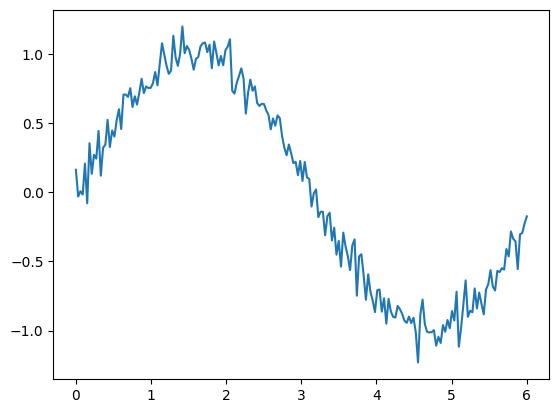

In [2]:
n = 200

X = np.linspace(0, 6, n).reshape(n,1)
y = np.sin(X) + 0.1 * np.random.randn(*X.shape)
plt.plot(X, y)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
  test_size=0.3, random_state=random_state)

train_data_linear = lgb.Dataset(X_train, label=y_train, params={"linear_tree": True})

train_data_normal = lgb.Dataset(X_train, label=y_train)

C:\Users\Mateusz\miniconda3\envs\linear-trees\lib\site-packages\lightgbm\basic.py:335: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


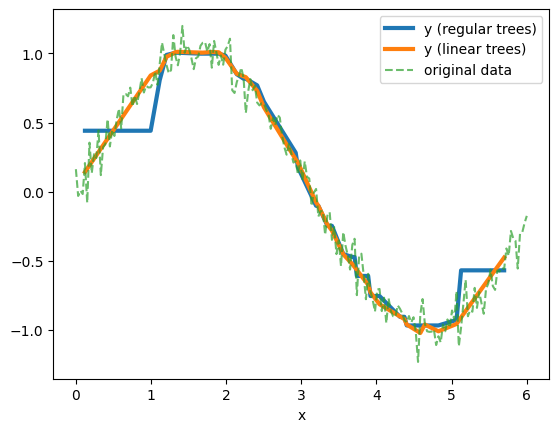

In [21]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "num_leaves": 30,
    "learning_rate": 0.1,
    "verbosity": -1
}

# fitting
model_linear = lgb.train(params, train_data_linear)
model_normal = lgb.train(params, train_data_normal)
y_pred_linear = model_linear.predict(X_test, num_iteration=model_linear.best_iteration)
y_pred_normal = model_normal.predict(X_test, num_iteration=model_normal.best_iteration)

# plotting results
df = pd.DataFrame(X_test, columns=["x"])
df["y (regular trees)"] = y_pred_normal
df["y (linear trees)"] = y_pred_linear
df.sort_values("x").set_index("x").plot(lw=3)
plt.plot(X, y, label="original data", alpha=0.7, linestyle="--")
plt.legend()
plt.show()

## Error metrics

In [5]:
print(f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
print(f"Normal trees error: {round(mean_squared_error(y_test, y_pred_normal),3)}")

Linear trees error: 0.011
Normal trees error: 0.044


## Extrapolation

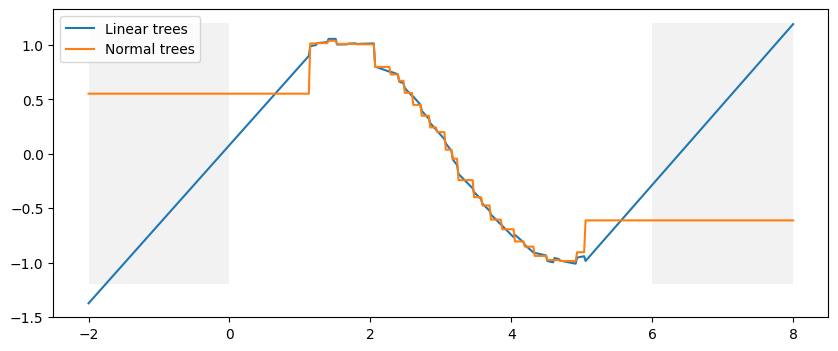

In [6]:
X_extrapol = np.linspace(-2, 8, 500)
X_extrapol = X_extrapol.reshape(X_extrapol.shape[0],1)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(X_extrapol, model_linear.predict(X_extrapol, num_iteration=model_linear.best_iteration), label="Linear trees")
ax.plot(X_extrapol, model_normal.predict(X_extrapol, num_iteration=model_normal.best_iteration), label="Normal trees")
ax.legend()

ax.fill_between(np.linspace(-2,0), -1.2, 1.2, facecolor="gray", alpha=0.1)
ax.fill_between(np.linspace(6,8), -1.2, 1.2, facecolor="gray", alpha=0.1)

plt.show()